<a href="https://colab.research.google.com/github/willpfigueiredo/imersao-dados-desafio-final/blob/main/Notebooks/ImersaoDados3_DesafioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imersão Dados 3 - Alura

Como forma de fechamento da imersão dados Alura, é porposto um desafio de análise de dados utilizando como base as ferramentas vistas nas aulas, bem como outras ferramentas disponíveis, dependendo das necessidades.

Os estudos em microbiologia vêm sofrendo grandes avanços tecnológicos nas últimas décadas e, atualmente, a automação laboratorial permite que se façam uma quantidade grande de experimentos, que geram uma quantidade enorme de dados a serem analisados.

Os estudos de efeitos de moléculas na microbiologia tem gerado dados cada vez mais numerosos e complexos, com um número muito grande de fatores a serem considerados nas análises.

Apesar de todo esse avanço, tempo e recursos ainda são limitados. E é aí que entram ferramentas computacionais e de data science que ajudam a limitar a quantidade de experimentos necessários para verificar o efeito de nocas substâncias. 

Com bons modelos, seria possível fazer uma pré-seleção de moléculas que seriam as melhores candidatas para uma dada aplicação e, assim, focar recursos naquelas que apresentam maiores chances de, de fato, apresentarem os efeitos desejados.

O estudo a seguir é uma introdução ao data Science, utilizando dois arquivos. O primeiro contém informações de expressão de genes e viabilidade em experimentos com diferentes doses, moléculas e tempos de ação. O segundo, contém informações sobre os mecanismos de ação ativados em cada experimento.

As perguntas a serem respondidas utilizando a análise de dados e o machine learning são:
 - As amostras estão balanceadas com relação aos parâmetros? (Tempo, dose, tratamento, droga)?
 - Há drogas utilizadas em apenas uma amostra?
  - As características de tempo e dose são uniformes nessas amostras?
 -Há correlação entre as expressões dos genes, para os primeiros 50 genes?
 -Há correlação entre as viabilidades das celulas, para aos 50 primeiros tipos de células?
 -A correlação de viabilidade é maior ao analisar para cada droga (analisar controle e 2 drogas mais usadas)
 - É possível obter um bom modelo para predizer a ocorrência de mecanismos de ativação com base nos dados?
 - As informações de viabilidade celular melhoram ou pioram o modelo?
 - É possível pum modelo de predição para a ativação de mecanismos específicos com base na expressão de genes e viabilidade?
 - A expressão de genes seriam bons preditores da viabilidade celular?

Importando as bibliotecas

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#bibliotecas necessárias para machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #separar os dados entre treinamento e verificação?
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #permite plotar um diagrama do classificador em árvore
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


Importam-se os dados disponíveis no repositório do desafio:


In [ ]:


url_dados = 'https://github.com/willpfigueiredo/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

Para se ter uma ideia de que tipo de informações estão disponíveis, pode-se realizar uma exploração:

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados.shape

(23814, 877)

In [ ]:
dados.columns.values

array(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11',
       'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19',
       'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27',
       'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35',
       'g-36', 'g-37', 'g-38', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43',
       'g-44', 'g-45', 'g-46', 'g-47', 'g-48', 'g-49', 'g-50', 'g-51',
       'g-52', 'g-53', 'g-54', 'g-55', 'g-56', 'g-57', 'g-58', 'g-59',
       'g-60', 'g-61', 'g-62', 'g-63', 'g-64', 'g-65', 'g-66', 'g-67',
       'g-68', 'g-69', 'g-70', 'g-71', 'g-72', 'g-73', 'g-74', 'g-75',
       'g-76', 'g-77', 'g-78', 'g-79', 'g-80', 'g-81', 'g-82', 'g-83',
       'g-84', 'g-85', 'g-86', 'g-87', 'g-88', 'g-89', 'g-90', 'g-91',
       'g-92', 'g-93', 'g-94', 'g-95', 'g-96', 'g-97', 'g-98', 'g-99',
       'g-100', 'g-101', 'g-102', 'g-103', 'g-104', 'g-105', 'g-106',
   

In [ ]:
dados.dtypes


id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

Temos id, tratamento, tempo, dose, genes 0 a 771 e células de 0 a 99 

Enquanto os valores nas colunas de genes e células são valores contínuos, os valores nas colunas id, tratamento, tempo, dose e droga parecem ser dados de categorias, o que podemos verificar:

In [ ]:
dados['id'].value_counts()

id_88e52696e    1
id_5db3b077e    1
id_2df740aee    1
id_67ebcce99    1
id_bb9648f09    1
               ..
id_67b382ad0    1
id_14d61cee3    1
id_f05cd7784    1
id_4763ccfab    1
id_de968a291    1
Name: id, Length: 23814, dtype: int64

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

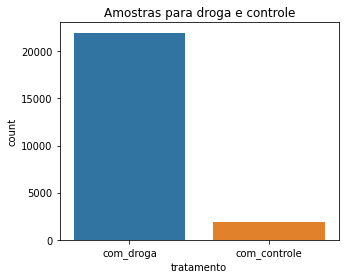

In [ ]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'tratamento', data = dados)
ax.set_title('Amostras para droga e controle')
plt.show()

In [ ]:
dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

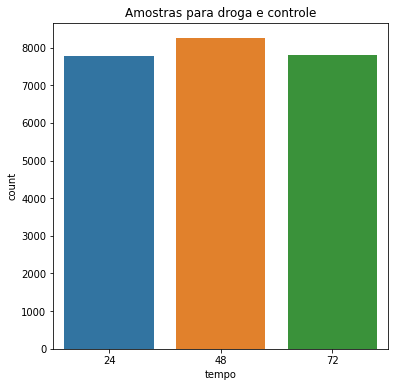

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'tempo', data = dados)
ax.set_title('Amostras para diferentes tempos')
plt.show()

In [ ]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

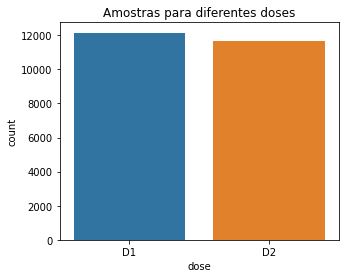

In [ ]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'dose', data = dados)
ax.set_title('Amostras para diferentes doses')
plt.show()

In [ ]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
a1a9a44dd       1
d9fcbe12c       1
b9ffc9444       1
4055d26a8       1
57f5932fb       1
Name: droga, Length: 3289, dtype: int64

6       2774
7        196
1        129
5         66
12        64
13        25
14         6
11         4
8          4
2          3
4          3
18         3
3          2
178        1
203        1
186        1
194        1
196        1
19         1
246        1
718        1
1866       1
202        1
Name: droga, dtype: int64

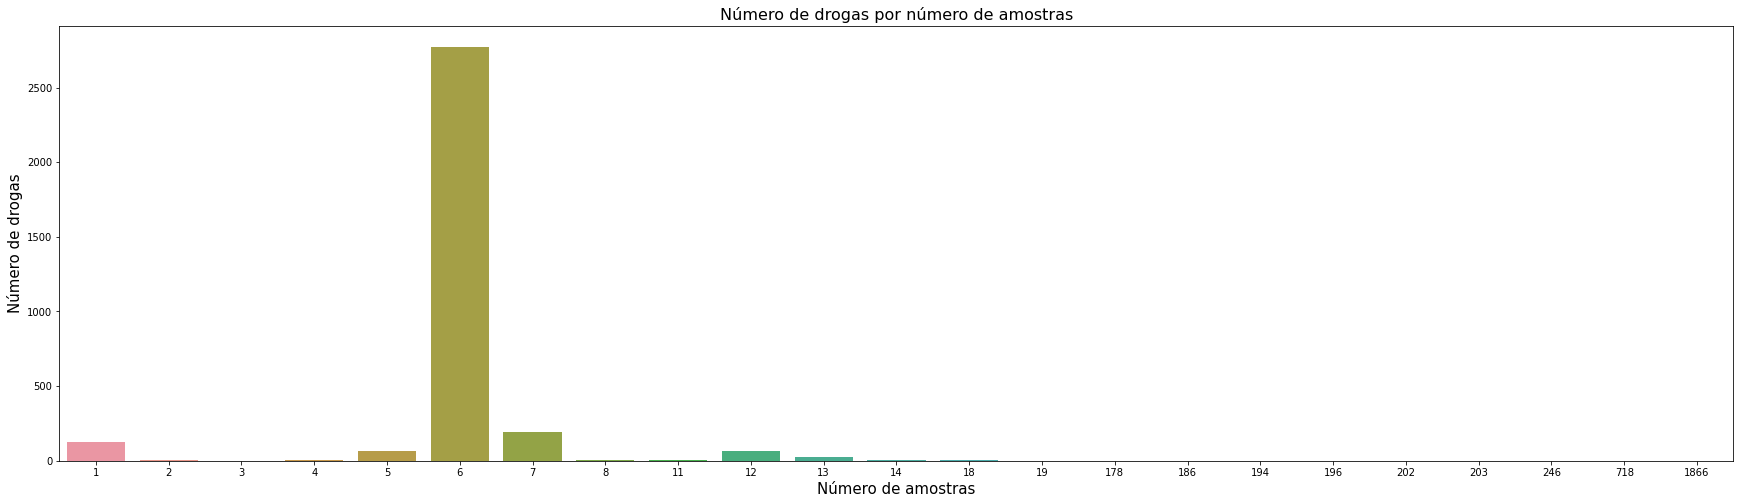

In [ ]:
index_droga_10_mais_controle = dados['droga'].value_counts().index[:11]
dados_drogas_10_mais_controle = dados.query('droga in @index_droga_10_mais_controle')

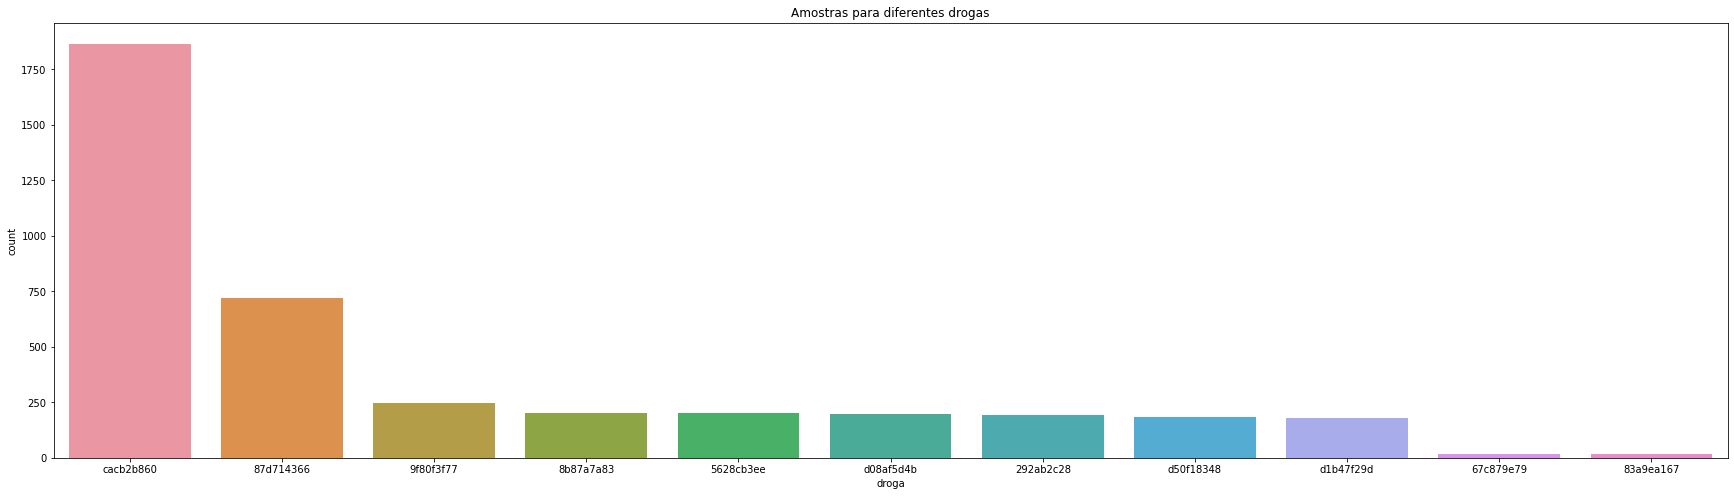

In [ ]:
plt.figure(figsize = (30,8))
ax = sns.countplot(x = 'droga', data = dados_drogas_10_mais_controle, order = index_droga_10_mais_controle)
ax.set_title('Amostras para diferentes drogas')
plt.show()

Há dados correspondentes a 23814 amostras, sendo um id para cada uma, 1886 com controle, em duas doses (D1 e D2) e três tempos diferentes (24, 48 e 72h).
O número de amostras com controle é igual ao número de amostras com a droga 'cacb2b860', o que pode ser verificado com um subset dos dados que contenham somente aqueles em que a coluna 'tratamento' seja igual a 'com_controle' e verificando quantos valores diferentes aparecem na coluna 'droga' desse subset.

In [ ]:
dados_com_controle = dados.query('tratamento  == "com_controle"')

In [ ]:
dados_com_controle['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

Portanto, a droga cacb2b860 equivale ao tratamento "com_controle".

Para analisar o baçanceamento do experimento em relação às drogas, podemos fazer uma contagem de número de amostras. Ou seja, chegaremos ao número de drogas que foram usadas em um certo número de amostras.

In [ ]:
droga_value_counts = dados['droga'].value_counts()
droga_value_counts.value_counts()

6       2774
7        196
1        129
5         66
12        64
13        25
14         6
11         4
8          4
2          3
4          3
18         3
3          2
178        1
203        1
186        1
194        1
196        1
19         1
246        1
718        1
1866       1
202        1
Name: droga, dtype: int64

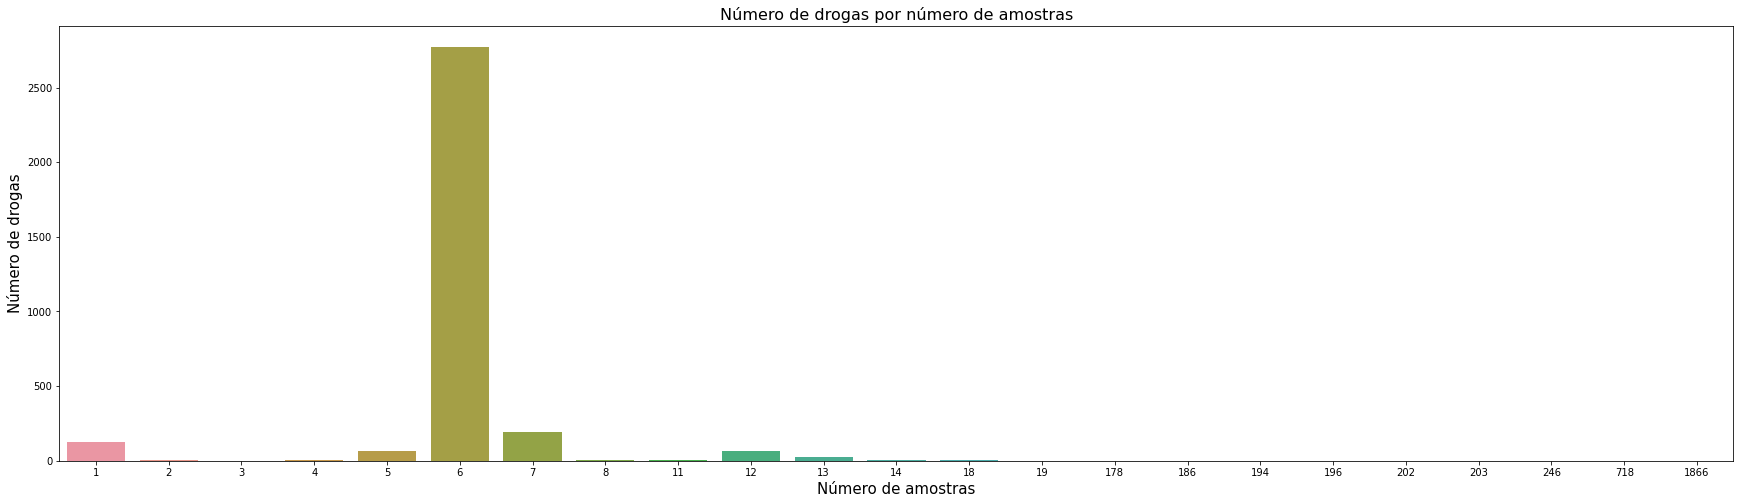

In [ ]:
plt.figure(figsize = (30,8))
ax = sns.countplot(x = droga_value_counts.index, data = droga_value_counts)
ax.set_title('Número de drogas por número de amostras', fontsize = 16)
ax.set_ylabel('Número de drogas', fontsize = 15)
ax.set_xlabel ('Número de amostras', fontsize = 15)
plt.show()

Esse histograma mostra o desequilíbrio do experimento em relação ao número de amostras por número de drogas. Há mais de 2500 drogas usadas em 6 amostras cada, enquanto há drogas que, sozinhas, têm 1866 amostras e outra usada em 718 amostras, por exemplo.

Selecionando linhas com as 129 drogas que foram usadas em apenas uma amostra

In [ ]:
index_drogas_single = droga_value_counts.index[3160:3290]
dados_droga_single = dados.query('droga in @index_drogas_single')
dados_droga_single

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
278,id_02e8f0488,com_droga,48,D1,225385f09,-0.4453,-0.5246,1.2070,-0.5038,1.9800,0.4926,0.5208,0.9390,-0.0425,-0.5504,-0.2467,-0.0204,-0.3320,-0.0777,0.4759,0.0075,0.9671,0.1883,0.1669,-1.2970,0.0251,0.7288,-1.1650,0.0799,-1.8270,-0.4815,-0.3177,-0.8564,-0.3140,1.1100,-0.1786,0.5543,0.3573,1.0400,0.4827,...,0.2184,0.2631,0.1911,0.0594,0.3898,0.1044,0.2873,-0.0240,-0.2646,-0.0568,-0.5525,0.2333,-0.1919,0.1213,-0.2048,0.6382,0.2566,0.5657,0.8201,0.8892,0.2890,0.0426,0.2640,0.1991,-0.4888,0.4281,0.2917,0.1598,0.5741,0.1769,0.3406,-1.3910,0.2447,0.1516,0.4123,-0.5694,0.3400,-0.2873,-0.1418,-0.4182
767,id_07de073c5,com_droga,48,D1,82dcdb180,-0.5931,0.0954,-0.0737,0.2239,0.0348,0.7103,0.0326,0.0289,-0.5462,2.1530,0.9603,-0.1256,0.4704,-0.3242,0.1031,0.2610,0.5134,-0.5882,0.4857,0.0857,0.3176,-1.2840,0.0345,0.2812,-0.6977,1.0950,0.6138,-0.2530,0.0256,0.4592,0.4108,-0.9510,-0.9418,0.9119,0.5622,...,0.2086,-0.1620,-0.2263,0.5459,0.2844,0.6695,0.1553,0.5303,-0.3965,-0.9420,0.0140,0.1261,0.2553,-0.2502,-0.1875,0.5420,-0.2487,0.7725,-0.3441,0.5233,-0.4962,-0.2449,0.1288,0.2126,0.5341,0.4749,-0.8556,0.0824,-0.4836,-0.2121,0.2767,0.4304,-0.2122,-0.5064,-0.5020,-0.5790,-0.0635,-0.8659,0.1665,0.1657
891,id_08ffed841,com_droga,48,D1,ed81f4046,2.9090,-1.9900,0.9251,-2.2030,-0.5839,0.4776,1.5240,1.3440,-0.2991,-0.5900,-0.5207,-0.3544,3.1420,-0.9059,-1.7440,-0.6488,-0.2182,-0.4732,-0.0833,-0.1066,0.8602,-0.3207,0.3892,-0.2630,0.1300,-0.4816,-1.3470,-1.1430,0.1268,0.8590,0.6005,0.8980,-0.3063,-0.5747,-1.0760,...,0.3375,0.8713,0.5124,0.0766,-0.0266,-3.7860,-0.0623,-0.2164,0.8543,0.3968,-0.0755,0.5250,-0.5288,-0.4369,0.7463,0.4144,-0.1996,-0.2263,0.5807,-1.6890,-0.2208,-0.4815,0.5058,0.7158,0.5710,-0.1781,-0.3217,0.4575,0.3459,0.8764,-0.1093,0.6227,-1.0270,-0.5568,0.4576,0.1899,-0.0811,0.5585,-3.2600,0.3554
1049,id_0ab20de22,com_droga,48,D1,277f1d6f9,0.8213,-0.8679,0.7387,-0.6937,0.4704,0.3657,2.7920,2.7350,-0.9835,-0.4681,-0.0098,-0.5091,-0.8379,-1.2270,-1.2250,-0.2512,0.6203,-1.6370,-0.7576,0.4809,-0.5414,-1.0470,-1.2360,0.3399,0.3641,-1.0200,-0.7952,-1.4390,-0.6784,0.2862,0.4951,0.7004,-0.1156,-0.3738,-0.7412,...,0.6880,0.1854,-0.0150,0.2082,0.2355,-0.2538,0.3250,-0.3796,-0.5306,0.0652,0.7261,0.8734,-0.2349,0.3068,0.6629,-0.6818,0.7293,0.5045,1.0860,0.0952,0.3801,-0.8952,0.4900,0.9041,-0.3754,0.5538,0.3229,0.3490,0.2359,-0.6177,-0.7906,0.9372,1.0180,0.8442,0.6541,-0.8238,0.1134,0.3509,0.1179,0.1046
2076,id_1654e7ad1,com_droga,48,D1,29d24570f,-1.2860,-0.0215,-0.4170,0.3535,0.6018,0.3742,-0.7841,0.0856,0.2096,0.3153,0.1499,0.3240,0.1552,0.7279,0.4279,0.2448,0.6292,0.0269,0.2415,1.3690,0.9040,-0.0725,-0.0056,0.3372,-0.1499,0.1077,0.5706,0.1990,0.3038,1.4810,0.5001,-0.1353,-0.2980,-0.6263,-0.0761,...,0.6851,0.3044,0.7483,0.2428,1.2190,0.0179,0.8416,0.0127,0.1958,0.2100,1.0940,0.2372,0.2691,0.7031,0.5215,-0.1570,0.0087,0.7756,-0.2733,0.8209,0.7967,-0.7415,0.4170,-0.0279,0.5206,0.2068,0.4451,0.6015,0.3968,0.3819,0.4137,0.0498,0.7525,0.7462,-0.1723,1.0200,0.0142,-0.2172,0.5944,0.9881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23258,id_f9de89f0a,com_droga,48,D1,19b95658c,-0.1171,0.9811,0.7350,1.3070,0.3786,0.9736,-0.4049,0.2763,1.5920,0.2936,0.6768,0.1627,2.9430,0.0930,-0.5242,-0.0014,2.3350,1.2360,-0.1127,-2.0530,-0.2833,2.2940,-0.0988,0.0000,0.2475,-0.3091,0.6113,0.0828,0.2300,-0

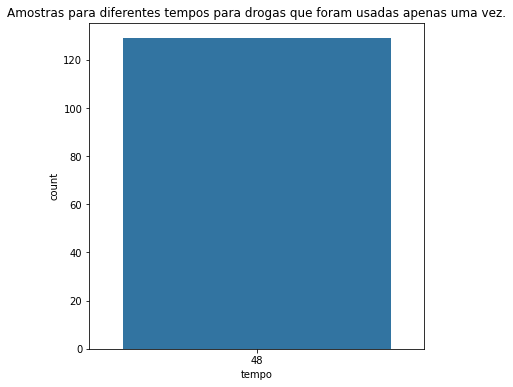

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'tempo', data = dados_droga_single)
ax.set_title('Amostras para diferentes tempos para drogas que foram usadas apenas uma vez.')
plt.show()

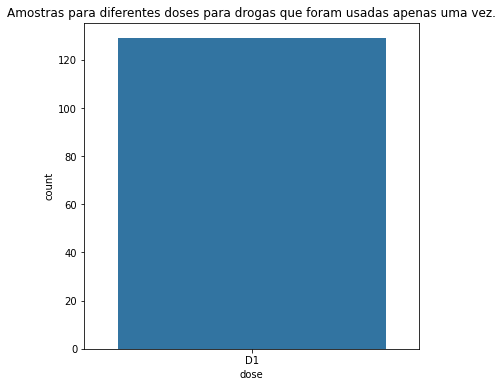

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'dose', data = dados_droga_single)
ax.set_title('Amostras para diferentes doses para drogas que foram usadas apenas uma vez.')
plt.show()

Todas as drogas que só foram usadas em uma amostra, foram usadas com a dose D1 e o tempo de 48H. Isso permite analisar as diferenças de efeito entre as drogas, mas impede a análise de influência do tempo e da dose para essas amostras.

Agora realizamos uma análise de correlação entre as expressões dos genes.

Text(0.5, 1.0, 'Correlação entre as expressões dos 50 primeiros genes')

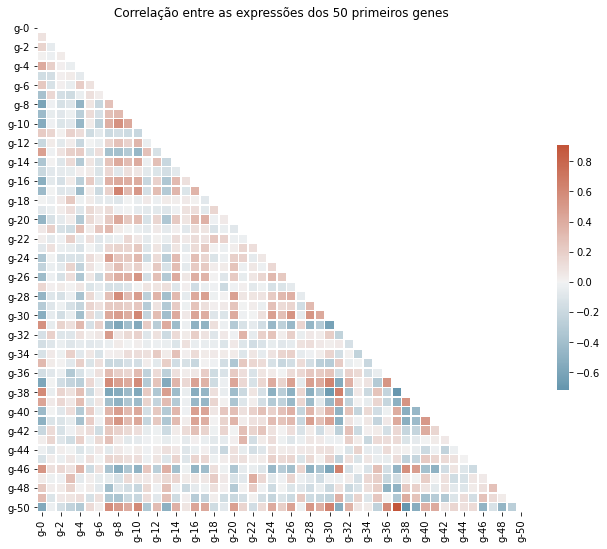

In [ ]:
# Compute the correlation matrix
corr = dados.loc[:, 'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação entre as expressões dos 50 primeiros genes')

Mesmo numa análise em conjunto, há diversos genes curja expressão está descorrelacionada com os outros genes pesquisados.

Analisando a correlação da viabilidade entre as células:

Text(0.5, 1.0, 'Correlação entre as viabilidades das primeiras 50 células')

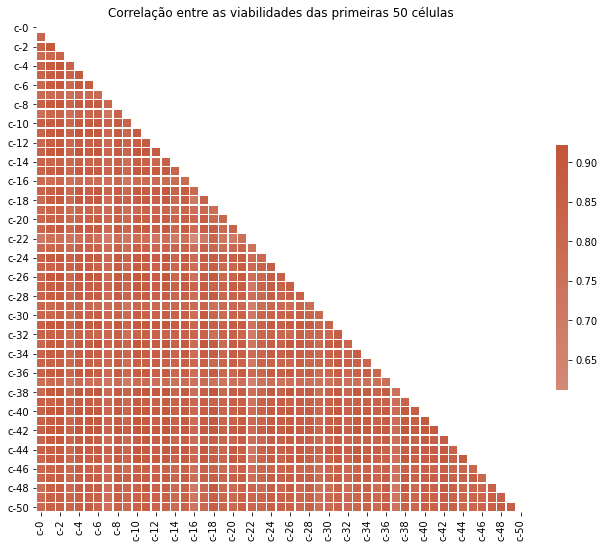

In [ ]:
# Compute the correlation matrix
corr_cells = dados.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cells, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cells, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação entre as viabilidades das primeiras 50 células')

Há uma  certa correlação entre a viabilidade de diferentes células. No entanto, esses dados podem estar mascarados pelos diferentes tipos de drogas. Ou seja, enquanto uma droga afeta a viabilidade de algumas células, outras drogas afetam a viabilidade de outras células, resultando num efeito conjunto similar entre elas.

Text(0.5, 1.0, 'Correlação entre as viabilidades das primeiras 50 células com controle')

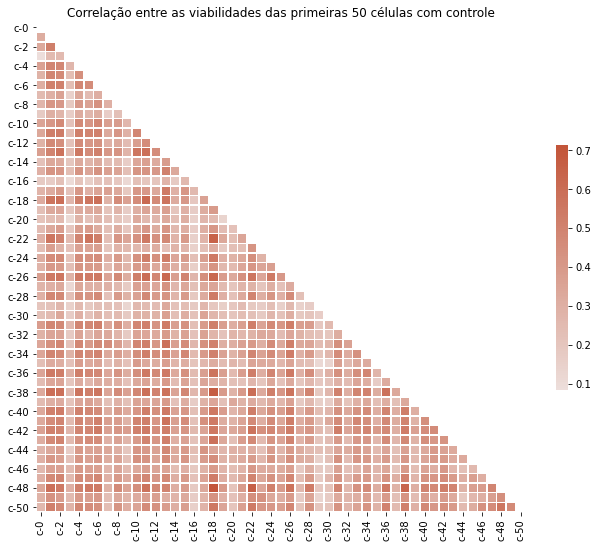

In [ ]:
# Compute the correlation matrix
corr_cells = dados_com_controle.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cells, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cells, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação entre as viabilidades das primeiras 50 células com controle')

Analisando somente as amostras com controle, já é possível ver uma diferença nas correlações, que agora variam de 0.1 a 0.7. Ou seja, naturalmente, nas condições do experimento, as células têm diferentes viabilidades.

Text(0.5, 1.0, 'Correlação entre as viabilidades das primeiras 50 células para a droga 87d714366')

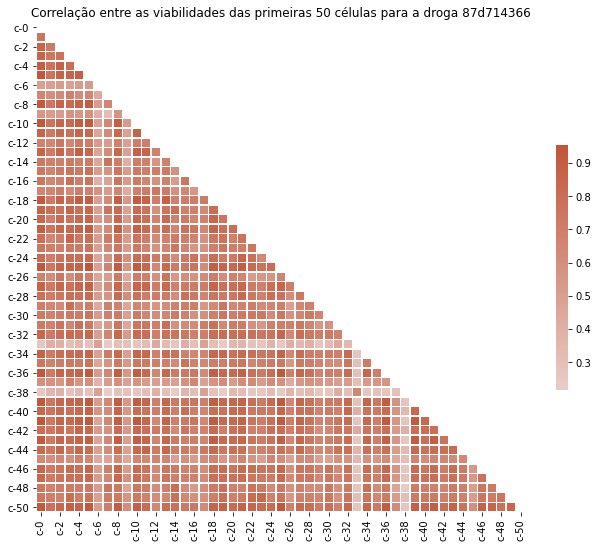

In [ ]:
index_droga_01_mais = dados['droga'].value_counts().index[1:2]
dados_drogas_01_mais = dados.query('droga in @index_droga_01_mais')
# Compute the correlation matrix
corr_cells = dados_drogas_01_mais.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cells, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cells, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação entre as viabilidades das primeiras 50 células para a droga 87d714366')

Text(0.5, 1.0, 'Correlação entre as viabilidades das primeiras 50 células para a droga 9f80f3f77')

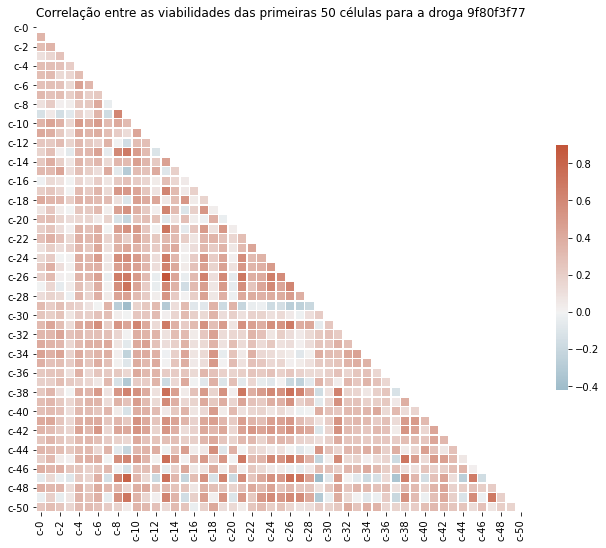

In [ ]:
index_droga_02_mais = dados['droga'].value_counts().index[2:3]
dados_drogas_02_mais = dados.query('droga in @index_droga_02_mais')
# Compute the correlation matrix
corr_cells = dados_drogas_02_mais.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cells, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cells, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação entre as viabilidades das primeiras 50 células para a droga 9f80f3f77')

As células, além de naturalmente terem viabilidades diferentes, podem apresentar diferentes efeitos para cada droga. A primeira droga analisada, por exemplo, parece ter influenciado as células de forma similar, aumentando a correlação entre as viabilidades. Já a segunda droga faz com que algumas correlações cheguem a ser negativas, ou seja, enquanto diminui a viabilidade de algumas células, aumenta a de outras.

Agora, carregando os dados dos resultados:

In [ ]:
dados_resultados = pd.read_csv('https://raw.githubusercontent.com/willpfigueiredo/imersao-dados-desafio-final/main/Dados/dados_resultados.csv')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_resultados.dtypes

id                                       object
5-alpha_reductase_inhibitor               int64
11-beta-hsd1_inhibitor                    int64
acat_inhibitor                            int64
acetylcholine_receptor_agonist            int64
                                          ...  
ubiquitin_specific_protease_inhibitor     int64
vegfr_inhibitor                           int64
vitamin_b                                 int64
vitamin_d_receptor_agonist                int64
wnt_inhibitor                             int64
Length: 207, dtype: object

In [ ]:
dados_resultados['acat_inhibitor'].value_counts()

0    23790
1       24
Name: acat_inhibitor, dtype: int64

In [ ]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
contagem_moa = dados_resultados.drop('id', axis = 1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [ ]:
count_moa_10_mais = contagem_moa[:10]
count_moa_10_mais

nfkb_inhibitor                    832
proteasome_inhibitor              726
cyclooxygenase_inhibitor          435
dopamine_receptor_antagonist      424
serotonin_receptor_antagonist     404
dna_inhibitor                     402
glutamate_receptor_antagonist     367
adrenergic_receptor_antagonist    360
cdk_inhibitor                     340
egfr_inhibitor                    336
dtype: int64

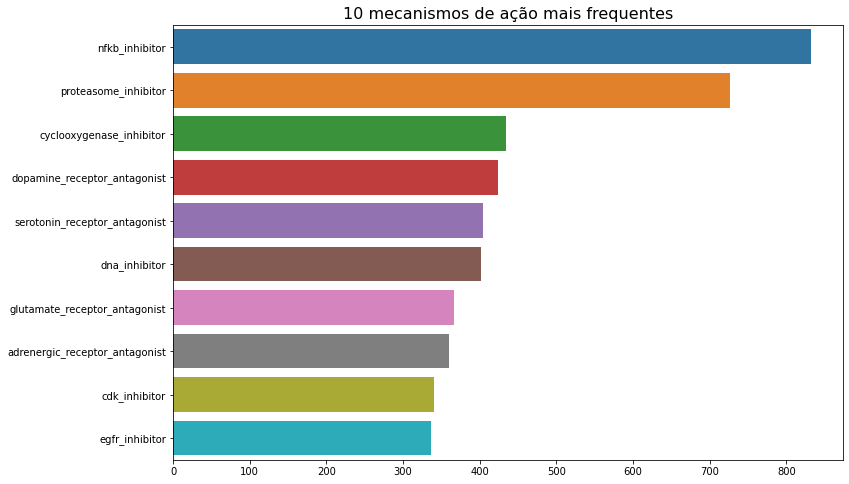

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.barplot(y = count_moa_10_mais.index, x = count_moa_10_mais.values)
ax.set_title('10 mecanismos de ação mais frequentes', fontsize = 16)
plt.show()

Adicionando informações de ocorrência de mecanismos de ação:

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis=1)

In [ ]:
dados_resultados['ativo_moa'] =(dados_resultados['n_moa']!=0)

A coluna n_moa contém quantos mecanismos de ação foram ativados em uma dada amostra. Já a coluna ativo_moa, indica se houve ou não algum mecanismo de ativação presente.

In [ ]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [ ]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa','ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Para o treinamento do modelo de regressão logística, serão utilizados os dados do tipo numéricos de ponto flutuante (float64), ou seja, expressões gênicas e viabilidades, já que tratamento, dose e 

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = 3768)

modelo_rlogistica = LogisticRegression(max_iter = 1000)# max_iter -> máximo de interações para evitar warning de convergência do modelo
#Treinar o modelo
modelo_rlogistica.fit(x_treino,y_treino)
#testar o modelo
modelo_rlogistica.score(x_teste, y_teste)

0.6330044089859332

Utilizamos um modelo dummy para comparar com o modelo preciamente criado. O modelo dummy.

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy) #calcula metrica do quanto o modelo acerta

0.6067604450976275

Resultado do modelo em regressão logística foi muito parecido com o modelo dummy, ou seja, o modelo não é bom para inferir a ocorrência de algum mecanismo de ação.

Pode-se implementar classificadores por árvore de decisão, que irão variar em profundidade, e analisar a performance com os dados de treino e teste:

In [ ]:
teste = []
treino = []

for i in range(1,15):
  modelo_arvore = DecisionTreeClassifier(max_depth = i)
  modelo_arvore.fit(x_treino, y_treino)
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))

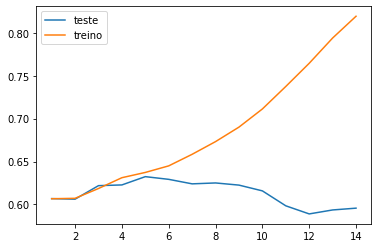

In [ ]:
sns.lineplot(x=range(1,15), y = teste, label = 'teste')
sns.lineplot(x=range(1,15), y = treino, label = 'treino')

O melhor resultado obtido ocorre com a profundidade da árvore igual a 5. Após esse valor, os resultados com o conjunto de testes pioram. Os acertos melhoram para os dados de teste, o que indica overfit, ou seja, o modelo consegue inferir bem quando os dados de entrada são os dados de teste.

Serão adicionados valores referentes a tratamento, dose e tempo, para verificar se melhoram o modelo:

In [ ]:
pd.get_dummies(dados_combinados, columns =  ['tratamento', 'dose', 'tempo'])

,id,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,...,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.220

In [ ]:
x2 = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis = 1)
x2 = pd.get_dummies(x2, columns =  ['tratamento', 'dose', 'tempo'])
y2 = dados_combinados['ativo_moa']
x_treino2, x_teste2, y_treino2, y_teste2 = train_test_split(x2,y2, test_size = 0.2, stratify = y2, random_state = 3768)

teste2 = []
treino2 = []

for i in range(1,15):
  modelo_arvore2 = DecisionTreeClassifier(max_depth = i)
  modelo_arvore2.fit(x_treino2, y_treino2)
  teste2.append(modelo_arvore2.score(x_teste2, y_teste2))
  treino2.append(modelo_arvore2.score(x_treino2, y_treino2))

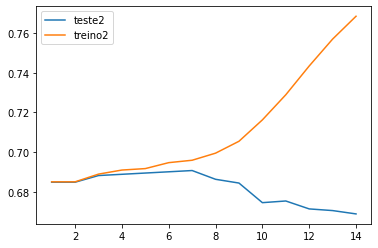

In [ ]:
sns.lineplot(x=range(1,15), y = teste2, label = 'teste2')
sns.lineplot(x=range(1,15), y = treino2, label = 'treino2')

In [ ]:
modelo_dummy2 = DummyClassifier('most_frequent')
modelo_dummy2.fit(x_treino2, y_treino2)
previsao_dummy2 = modelo_dummy2.predict(x_teste2)
accuracy_score(y_teste2, previsao_dummy2)

0.6067604450976275

A Adição dos fatores de tratamento, tempo e dose melhroaram o modelo, que passou a ter uma performance de cerca de 69% para profundidade igual a 7. Enquanto isso, o modelo dummy equivalente manteve a performance em cerca de 60%.

Será utilizado agora o classificador de floresta randômica:

In [ ]:
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis = 1)
x = pd.get_dummies(x, columns =  ['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = 3768)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6825530128070544

O resultado utilizando o classificador de floresta randômica foi similar ao da árvore de decisões com profundidade igual a 7 utilizando os mesmos fatores como entrada.

Será analisada a performance da árvore de decisões sem os dados de viabilidade:

In [ ]:
x3 = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis = 1)
x3 = pd.get_dummies(x3, columns =  ['tratamento', 'dose', 'tempo'])

y3 = dados_combinados['ativo_moa']
x_treino3, x_teste3, y_treino3, y_teste3 = train_test_split(x3,y3, test_size = 0.2, stratify = y3, random_state = 3768)
unwanted = x3.columns[x3.columns.str.startswith('c-')]
x3.drop(unwanted, axis=1,inplace=True)

teste3 = []
treino3 = []

for i in range(1,15):
  modelo_arvore3 = DecisionTreeClassifier(max_depth = i)
  modelo_arvore3.fit(x_treino3, y_treino3)
  teste3.append(modelo_arvore3.score(x_teste3, y_teste3))
  treino3.append(modelo_arvore3.score(x_treino3, y_treino3))

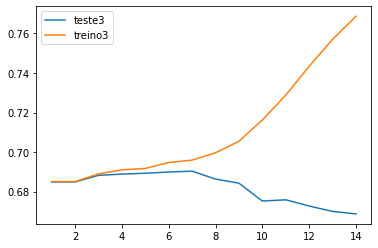

In [ ]:
sns.lineplot(x=range(1,15), y = teste3, label = 'teste3')
sns.lineplot(x=range(1,15), y = treino3, label = 'treino3')


In [ ]:
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino3, y_treino3)
modelo_randomforest.score(x_teste3, y_teste3)

0.6890615158513542

As informações de viabilidade não alteraram a performance do modelo de árvore de decisões ou de floresta randômica.

Para analisar o modelo em relação a um mecanismo específico, será utilizado o de maior ocorrência, nfkb_inhibitor.

In [ ]:
dados_combinados_nfkb = pd.merge(dados, dados_resultados[['id','nfkb_inhibitor']], on='id')
dados_combinados_nfkb

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,nfkb_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-

In [ ]:
x_nfkb = dados_combinados_nfkb.drop(['id', 'droga'], axis = 1)
x_nfkb = pd.get_dummies(x_nfkb, columns =  ['tratamento', 'dose', 'tempo'])

y_nfkb = dados_combinados_nfkb['nfkb_inhibitor']
x_treino_nfkb, x_teste_nfkb, y_treino_nfkb, y_teste_nfkb = train_test_split(x_nfkb,y_nfkb, test_size = 0.2, stratify = y_nfkb, random_state = 3768)

modelo_randomforest_nfkb = RandomForestClassifier()
modelo_randomforest_nfkb.fit(x_treino_nfkb, y_treino_nfkb)
modelo_randomforest_nfkb.score(x_teste_nfkb, y_teste_nfkb)

0.9997900482888935

O modelo parece ter uma performance muito boa para inferir a ocorrência do inibidor de nfkb.

In [ ]:
modelo_randomforest = RandomForestClassifier(n_estimators = 300)
modelo_randomforest.fit(x_treino3, y_treino3)
modelo_randomforest.score(x_teste3, y_teste3)

0.6901112744068865

In [ ]:
x3 = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'droga'], axis = 1)
x3 = pd.get_dummies(x3, columns =  ['tratamento', 'dose', 'tempo'])

y3 = dados_combinados['ativo_moa']
x_treino3, x_teste3, y_treino3, y_teste3 = train_test_split(x3,y3, test_size = 0.05, stratify = y3, random_state = 3768)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino3, y_treino3)
modelo_randomforest.score(x_teste3, y_teste3)

0.6733837111670865

In [ ]:
dados_combinados_dna_inhibitor = pd.merge(dados, dados_resultados[['id','dna_inhibitor']], on='id')
x_dna_inhibitor = dados_combinados_dna_inhibitor.drop(['id', 'droga'], axis = 1)
x_dna_inhibitor = pd.get_dummies(x_dna_inhibitor, columns =  ['tratamento', 'dose', 'tempo'])

y_dna_inhibitor = dados_combinados_dna_inhibitor['dna_inhibitor']
x_treino_dna_inhibitor, x_teste_dna_inhibitor, y_treino_dna_inhibitor, y_teste_dna_inhibitor = train_test_split(x_dna_inhibitor,y_dna_inhibitor, test_size = 0.2, stratify = y_dna_inhibitor, random_state = 3768)

modelo_randomforest_dna_inhibitor = RandomForestClassifier()
modelo_randomforest_dna_inhibitor.fit(x_treino_dna_inhibitor, y_treino_dna_inhibitor)
modelo_randomforest_dna_inhibitor.score(x_teste_dna_inhibitor, y_teste_dna_inhibitor)

0.9995800965777871

In [ ]:
dados_combinados_diuretic = pd.merge(dados, dados_resultados[['id','diuretic']], on='id')
x_diuretic = dados_combinados_diuretic.drop(['id', 'droga'], axis = 1)
x_diuretic = pd.get_dummies(x_diuretic, columns =  ['tratamento', 'dose', 'tempo'])

y_diuretic = dados_combinados_diuretic['diuretic']
x_treino_diuretic, x_teste_diuretic, y_treino_diuretic, y_teste_diuretic = train_test_split(x_diuretic,y_diuretic, test_size = 0.2, stratify = y_diuretic, random_state = 3768)

modelo_randomforest_diuretic = RandomForestClassifier()
modelo_randomforest_diuretic.fit(x_treino_diuretic, y_treino_diuretic)
modelo_randomforest_diuretic.score(x_teste_diuretic, y_teste_diuretic)

0.9997900482888935

Usando o modelo de floresta randômica para a inferência de três mecanismos de acesso, a performance foi próxima de 100%. O número de ocorrências na amostra não parece ter grande influência sobre a performance do modelo.

Para entradas e saídas contínuas, será usado o modelo de regressão linear, com r2 como base do score:

In [162]:
x = dados.drop(['id', 'droga'], axis = 1)
x = pd.get_dummies(x, columns =  ['tratamento', 'dose', 'tempo'])
y = dados['c-0']
unwanted = x.columns[x.columns.str.startswith('c-')]
x.drop(unwanted, axis=1,inplace=True)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42)

modelo_linear = LinearRegression()
modelo_linear.fit(x_treino, y_treino)
linear_predict = modelo_linear.predict(x_teste)
score=r2_score(y_teste,linear_predict)
score

0.8164335676802918

In [161]:
x = dados.drop(['id', 'droga'], axis = 1)
x = pd.get_dummies(x, columns =  ['tratamento', 'dose', 'tempo'])
y = dados['c-1']
unwanted = x.columns[x.columns.str.startswith('c-')]
x.drop(unwanted, axis=1,inplace=True)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42)

modelo_linear = LinearRegression()
modelo_linear.fit(x_treino, y_treino)
linear_predict = modelo_linear.predict(x_teste)
score=r2_score(y_teste,linear_predict)
score


0.8795759689819307

In [163]:
x = dados.drop(['id', 'droga'], axis = 1)
x = pd.get_dummies(x, columns =  ['tratamento', 'dose', 'tempo'])
y = dados['c-2']
unwanted = x.columns[x.columns.str.startswith('c-')]
x.drop(unwanted, axis=1,inplace=True)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42)

modelo_linear = LinearRegression()
modelo_linear.fit(x_treino, y_treino)
linear_predict = modelo_linear.predict(x_teste)
score=r2_score(y_teste,linear_predict)
score

0.8817911655039695

Com a regressão linear, chegou-se a modelos em que 80 a 88% das variações de viabilidade são explicadas pela expressão dos genes.

#Conclusões

A distribuição das amostras entre os tempos e doses está balanceada. Há um leve desbalanceamento na distribuição entre as horas. 
O fator droga apresenta grande desequilíbrio, apresentando algumas drogas presentes em muitas amostras e muitas drogas presentes em poucas amostras. Essa distribuição pode ser o resultado de técnicas de design de experimentos, onde o conhecimento prévio de alguns fatores, mais os objetivos do experimento, determinam quais combinações de fatores dever ser feitas.
O mesmo poderia ser dito sobre drogas que foram utilizadas em apenas uma amostra, todas com o mesmo valor de dose e tempo.

Há genes com diferentes níveis de correlação entre as suas expressões, o que já era de se esperar, visto que genes com alta correlação de expressão provavelmente seriam retirados do estudo, tendo seus valores inferidos com base em um dos genes do grupo.

Diferentes tipos de células apresentam, naturalmente, diferentes resultados de viabilidade e diferentes drogas podem aumentar ou diminuir essa correlação. As diferentes células podem responder de forma parecida ou de forma diferente a uma mesma droga, portanto, é recomendável que as análises de viabilidade estratifiquem os tipos celulares.

Os modelos testados para inferir a ocorrência de algum mecanismo de ação tiveram performance máxima em torno de 69%. Enquanto a adição dos fatores dose, tempo e tratamento melhoraram o modelo, a retirada da viabilidade não mudou as performances.

Os modelos poderiam ser melhorados com mais estudos sobre os modelos disponíveis e suas características, bem como a influência dos seus parâmetros e atributos. Outra fonte de melhoria poderia ser o aumento dos dados disponíveis, para que o modelo se torne mais refinado quanto à relação entre os fatores e a ocorrência de mecanismos de ação.

Os modelos para inferência de mecanismos de ação específicos tiveram bons resultados, próximos de 100% de acerto, tanto para mecanismos frequentes na base de dados (mais de 800 ocorrências) quanto mecanismos menos frequentes(6 ocorrências).

O modelo de regressão linear conseguiu um desempenho razoável em explicar a viabilidade celular com base na expressão de genes. Assim, a expressão gênica poderia ser usada para prever a viabilidade das células. Aqui também caberiam melhorias no modelo tanto pelo estudo dos seus parâmetros e dos modelos disponíveis, bem como a adição de outros dados, como por exemplo outros genes.

##Referências:
- [Drug discovery: passado, presente e futuro](https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit?usp=sharing)
- [Expressão gênica: o caminho da informação biológica](https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view?usp=sharing)
 - [Documentação da biblioteca Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
 - [Documentação da biblioteca Seaborn](https://seaborn.pydata.org/api.html)
- [Documentação do ScikitLearn](https://scikit-learn.org/stable/about.html#citing-scikit-learn)
- [Multiple Linear Regression Using Python and Scikit-learn](https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/)
- [R-Squared Definition](https://www.investopedia.com/terms/r/r-squared.asp)
